EMAIL SPAM CLASSIFICATION MODEL

Essential Libraries and Import Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. LOAD DATASET
df = pd.read_csv('emails.csv')

ERD

In [4]:
# 2. DATA EXPLORATION & CLEANING
# Dropping 'Email No.' as it is just an ID and not a feature
X = df.drop(columns=['Email No.', 'Prediction']) 
y = df['Prediction']

print(f"Dataset Loaded: {df.shape[0]} emails, {df.shape[1]-2} word features.")
print("\nClass Distribution (0 = Ham, 1 = Spam):")
print(y.value_counts())

Dataset Loaded: 5172 emails, 3000 word features.

Class Distribution (0 = Ham, 1 = Spam):
Prediction
0    3672
1    1500
Name: count, dtype: int64


Visulization of Most Frequent Spam words

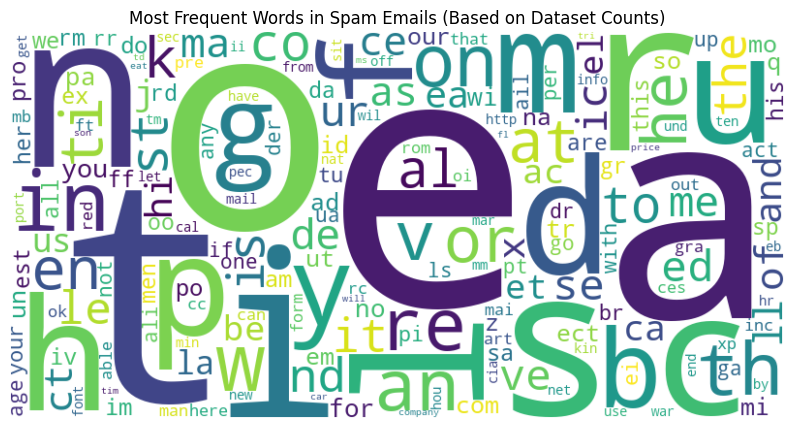

In [ ]:
# 3. VISUALIZATION (Word Cloud from Frequencies)
# Since I don't have raw text, we generate the cloud from the word counts in the CSV
spam_words_freq = X[y == 1].sum().to_dict()

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_words_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Spam Emails (Based on Dataset Counts)')
plt.show()

Train The Model

In [6]:
# 4. SPLIT DATA (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. TRAIN THE MODEL
# Multinomial Naive Bayes is perfect for word-count data
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Performance Matrix

In [7]:
# 6. EVALUATE PERFORMANCE
y_pred = model.predict(X_test)

print("\n" + "="*30)
print("      MODEL PERFORMANCE")
print("="*30)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


      MODEL PERFORMANCE
Accuracy: 95.46%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



Confusion Matrix

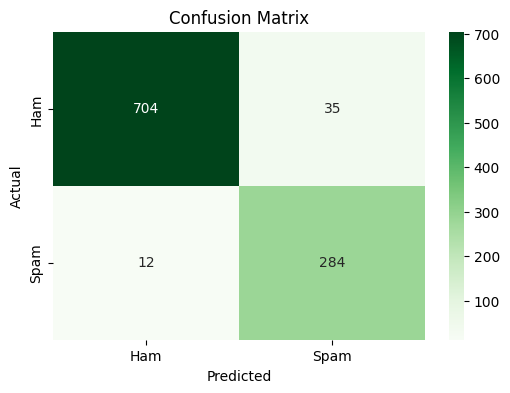

In [8]:
# 7. CONFUSION MATRIX VISUALIZATION
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()